In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 11 12:31:24 2016

@author: jgodbout
"""

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

plt.close('all')

# Let figures pop without breaking execution.
plt.ion()

"""
excerpt.txt:  
    is a textual file containing, in first line, the name of the signal 
    extracted (the central EEG) and then 1 column with the values (amplitudes 
    in microvolt) of its samples. The number of samples depends on the sampling
    rate corresponding to the excerpt (see Database description)
Automatic_detection_excerpt.txt:  
    is a textual file containing, in first line, the name of the detection and 
    then 2 columns of numerical values. The first column contains time instants
    (in second) corresponding to the beginnings of the automatically detected 
    micro-events (from the beginning of the excerpt), and the second one 
    contains their durations (in second). 
Visual_scoring1_excerpt.txt: 
    is a textual file containing, in the first line, the name of the detection 
    and then, 2 columns of numerical values. The first column contains time 
    instants (in second) corresponding to the beginnings of the micro-events 
    scored by the expert 1 (from the beginning of the excerpt), and the second 
    one contains their durations (in second). 
Visual_scoring2_excerpt.txt:  
    is a textual file containing, in first line, the name of the detection and 
    then 2 columns of numerical values. The first column contains time instants
    (in second) corresponding to the beginnings of the micro-events scored by 
    the expert 2 (from the beginning of the excerpt), and the second one
    contains their durations (in second). 
Hypnogram_excerpt.txt:  
    is a textual file containing, in first line, the name "[hypnogram]" 
    followed by one column of integer. These numerical values correspond to the
    sleep stage (one value per 5 sec) annotated by the expert according to the
    Rechtschaffen and Kales criteria.
         5=wake
         4=REM stage
         3=sleep stage S1
         2=sleep stage S2
         1=sleep stage S3
         0=sleep stage S4
         -1=sleep stage movement
         -2 or -3 =unknow sleep stage 
"""

# Pseudo enum
class Gender: 
    woman = 0
    man = 1
    
def ReadListOfColsFromFile(filename):
    with open(filename) as file:
        lines = file.read().split('\n')
        
        # Filter file edges
        lines.pop(0) # The name of the electrode
        lines.pop() # Remove last line (empty, crashes)
                
        # Initialize an empty list of empty lists.
        numcols = len(lines[0].split())
        data = [[] for i in range(numcols)]
        
        for line in lines:
            words = line.split()
            for idx, val in enumerate(words):
                data[idx].append(float(val))
                
    # Return a list of lists as a numpy array to allow arithmetics (+ more).
    return np.array(data)
    
class CHypnogram:
    def __init__(self, filename, fs):
        self.fs = fs
        self.data = ReadListOfColsFromFile(filename)[0]
        self.time = np.arange(0, len(self.data)) / self.fs
        
    def plot(self):
        plt.figure()           
        plt.plot(self.time, self.data) 

# EEG file object
class CEeg:
    def __init__(self, filename, fs, age, gender):
        self.fs = fs
        self.data = ReadListOfColsFromFile(filename)[0]
        self.time = np.arange(0, len(self.data)) / self.fs
        self.age = age
        self.gender = gender
                
    def plot(self):
        plt.figure()           
        plt.plot(self.time, self.data) 
        
class CExpert:
    def __init__(self, filename, fs):
        self.fs = fs
        data = ReadListOfColsFromFile(filename)
        self.iduration = (data[1] * self.fs).astype(int)
        self.iposition = ((data[0] + self.iduration/2.0)*self.fs).astype(int)
        
    def idx(self, iposition, iduration):
        istart = iposition - iduration/2
        iend   = iposition + iduration/2
        return range(int(istart), int(iend))
        
    def plot(self, eeg, i):
        idx = self.idx(self.iposition[i], self.iduration[i])
        plt.figure()           
        plt.plot(eeg.time[idx], eeg.data[idx]) 




In [2]:
%matplotlib notebook

In [7]:
import os
os.getcwd()

'/Users/jonathangodbout/Documents/github/hellopython'

<IPython.core.display.Javascript object>


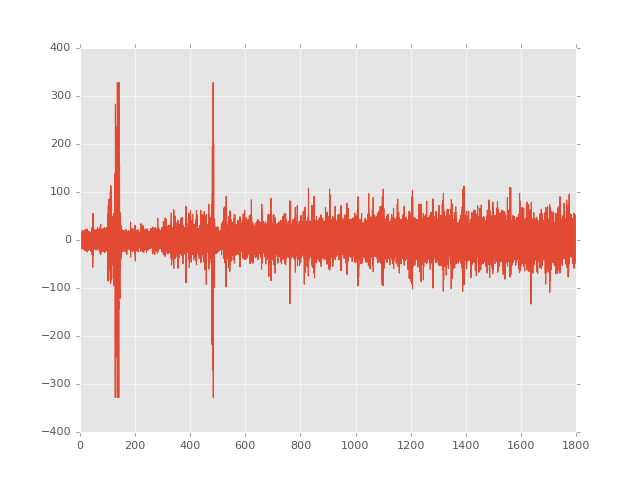

In [4]:
# excerpt1 100Hz 51 Woman extracted from 03:15:00 to 03:45:00 C3-A1 52 115 
#eegname = "https://github.com/jnthngdbt/hellopython/blob/master/data/spindle/excerpt1.txt"
eeg = CEeg(os.path.join("data","spindle","excerpt1.txt"), 100, 51, Gender.woman)
eeg.plot()

<IPython.core.display.Javascript object>


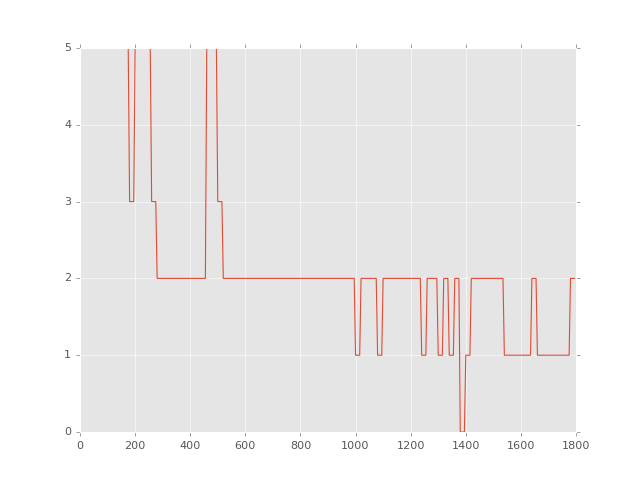

In [5]:
#hypnoname = "https://github.com/jnthngdbt/hellopython/blob/master/data/spindle/Hypnogram_excerpt1.txt"
hypno = CHypnogram(os.path.join("data","spindle","Hypnogram_excerpt1.txt"), 1/5)
hypno.plot()

<IPython.core.display.Javascript object>


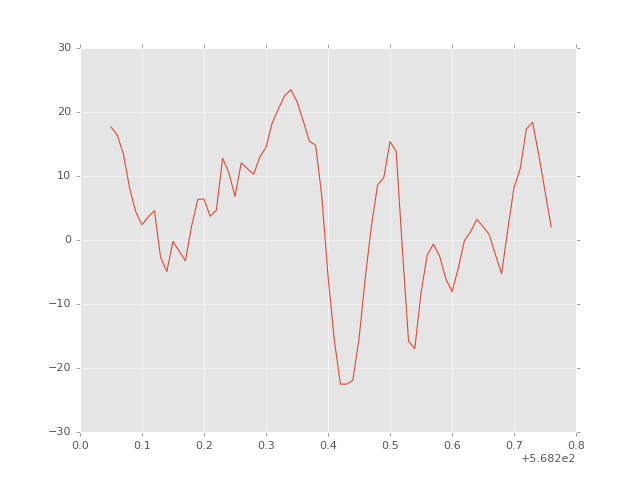

In [6]:
#expertname = "https://github.com/jnthngdbt/hellopython/blob/master/data/spindle/Visual_scoring1_excerpt1.txt"
expert = CExpert(os.path.join("data","spindle","Visual_scoring1_excerpt1.txt"), eeg.fs)
expert.plot(eeg, 15)